In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("Iris (1).csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
x = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values
print(x)
y

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [5]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [6]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 82)

# KNN Classifier

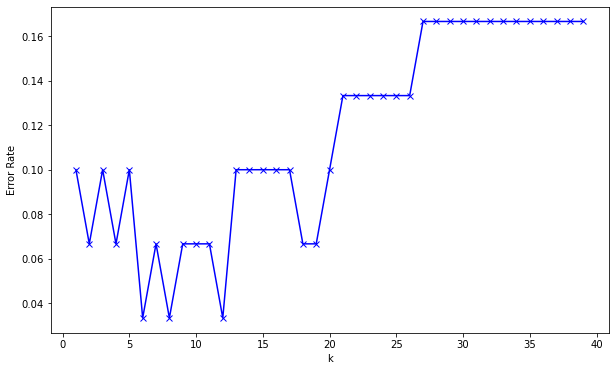

In [8]:
error_rate = []
for k in range(1, 40):
    knnModel = KNeighborsClassifier(n_neighbors=k)
    knnModel.fit(x_train, y_train)
    pred_k = knnModel.predict(x_test)
    error_rate.append(np.mean(pred_k != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1, 40), error_rate, 'bx-')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

In [9]:
model1 = KNeighborsClassifier(n_neighbors=12, metric="euclidean")
model1.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

In [10]:
y_pred = model1.predict(x_test)

In [11]:
x_test

array([[ 1.03800476e+00,  5.69251294e-01,  1.10395287e+00,
         1.18500970e+00],
       [-5.25060772e-02, -5.87763531e-01,  7.62758643e-01,
         1.57942861e+00],
       [-7.79513300e-01,  2.42047502e+00, -1.28440670e+00,
        -1.44444970e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.22754100e+00,
        -1.05003079e+00],
       [ 1.03800476e+00, -1.24957601e-01,  7.05892939e-01,
         6.59117823e-01],
       [ 6.86617933e-02, -1.24957601e-01,  2.50967307e-01,
         3.96171883e-01],
       [ 1.15917263e+00, -5.87763531e-01,  5.92161531e-01,
         2.64698913e-01],
       [ 1.89829664e-01, -1.97618132e+00,  7.05892939e-01,
         3.96171883e-01],
       [ 5.53333275e-01, -1.28197243e+00,  6.49027235e-01,
         3.96171883e-01],
       [ 9.16836886e-01, -3.56360566e-01,  4.78430123e-01,
         1.33225943e-01],
       [ 3.10997534e-01, -1.05056946e+00,  1.04708716e+00,
      

In [12]:
y_pred

array([2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2,
       0, 2, 2, 1, 2, 0, 2, 1])

In [13]:
y_test

array([2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2,
       0, 2, 2, 1, 2, 0, 2, 1])

In [14]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       0.90      1.00      0.95         9\n           2       1.00      0.90      0.95        10\n\n    accuracy                           0.97        30\n   macro avg       0.97      0.97      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'

In [15]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  9]])

# Multi-Class Logistic Regression

In [16]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression()

In [17]:
y_pred = model2.predict(x_test)
y_pred

array([2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2,
       0, 2, 2, 1, 2, 0, 2, 1])

In [18]:
y_test

array([2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2,
       0, 2, 2, 1, 2, 0, 2, 1])

In [19]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0,  8,  1],
       [ 0,  2,  8]])

In [20]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       0.80      0.89      0.84         9\n           2       0.89      0.80      0.84        10\n\n    accuracy                           0.90        30\n   macro avg       0.90      0.90      0.89        30\nweighted avg       0.90      0.90      0.90        30\n'